# Выбор локации для скважины

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Cromarty_Firth_Oil_Rigs_%2846600042654%29.jpg/640px-Cromarty_Firth_Oil_Rigs_%2846600042654%29.jpg 'joiseyshowaa')

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных
Данные хранятся в трёх файлах. Загрузим их и посмотрим на доступную информацию.

In [62]:
! gdown 1p-xysk8oZHlv_P-v-HFCV0HZQHIJOB1A

Downloading...
From: https://drive.google.com/uc?id=1p-xysk8oZHlv_P-v-HFCV0HZQHIJOB1A
To: /content/geo_data_0.csv
100% 8.21M/8.21M [00:00<00:00, 152MB/s]


In [63]:
! gdown 1EdU8NpwYoQxMNvfTGh1QuAo5ftcDSjr7

Downloading...
From: https://drive.google.com/uc?id=1EdU8NpwYoQxMNvfTGh1QuAo5ftcDSjr7
To: /content/geo_data_1.csv
100% 8.03M/8.03M [00:00<00:00, 112MB/s]


In [64]:
! gdown 1r8E2qBHYuiGOj9e-snBgdePa3ilSB_ht

Downloading...
From: https://drive.google.com/uc?id=1r8E2qBHYuiGOj9e-snBgdePa3ilSB_ht
To: /content/geo_data_2.csv
100% 8.19M/8.19M [00:00<00:00, 107MB/s]


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np

In [66]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15, 5)})

In [67]:
df0 = pd.read_csv('/content/geo_data_0.csv')

df0.head()

In [68]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [69]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [70]:
df0.duplicated().sum()

0

In [71]:
df1 = pd.read_csv('/content/geo_data_1.csv')

In [72]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [73]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [75]:
df1.duplicated().sum()

0

In [76]:
df2 = pd.read_csv('/content/geo_data_2.csv')

In [77]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [78]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [80]:
df2.duplicated().sum()

0

Итак, мы загрузили три набора данных. В каждом наборе имеется информация о 100 тысячах месторождений. Для каждого местрождения доступны признаки $f_0$, $f_1$, $f_2$. Что скрывается за этими признаками — неизвестно, но известно, что признаки значимые. Для каждого месторождения в колонке `product` приведена информация об объёме запасов (тысячи баррелей). Пропусков и дупликатов не обнаружено, все типы данных определились корректно.

### Исследовательский анализ данных

Посмотрим на доступные данные подробнее.

In [81]:
def eda(parameter_name, parameter_name_for_plots):
    #describe
    print(f'Параметр {parameter_name} в датафрейме df0:')
    display(df0[parameter_name].describe().to_frame())
    print(f'Параметр {parameter_name} в датафрейме df1:')
    display(df1[parameter_name].describe().to_frame())
    print(f'Параметр {parameter_name} в датафрейме df2:')
    display(df2[parameter_name].describe().to_frame())
    
    #plots
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": 
                                                     (.85, .15)})
    sns.histplot(data=df0, x=parameter_name, kde=True, ax=ax_hist)\
    .set(title=f'Гистограмма распределения признака ${parameter_name_for_plots}$, регион 0',
         ylabel='Количество записей');
    sns.boxplot(data=df0, x=parameter_name, ax=ax_box)\
    .set(xlabel=f'Значения признака ${parameter_name_for_plots}$');
    plt.show()
    
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": 
                                                     (.85, .15)})
    sns.histplot(data=df1, x=parameter_name, kde=True, ax=ax_hist)\
    .set(title=f'Гистограмма распределения признака ${parameter_name_for_plots}$, регион 1',
         ylabel='Количество записей');
    sns.boxplot(data=df1, x=parameter_name, ax=ax_box)\
    .set(xlabel=f'Значения признака ${parameter_name_for_plots}$');
    plt.show()
    
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": 
                                                     (.85, .15)})
    sns.histplot(data=df2, x=parameter_name, kde=True, ax=ax_hist)\
    .set(title=f'Гистограмма распределения признака ${parameter_name_for_plots}$, регион 2',
         ylabel='Количество записей');
    sns.boxplot(data=df2, x=parameter_name, ax=ax_box)\
    .set(xlabel=f'Значения признака ${parameter_name_for_plots}$');
    plt.show()

#### Признак $f_0$

Параметр f0 в датафрейме df0:


,f0
count,100000.000000
mean,0.500419
std,0.871832
min,-1.408605
25%,-0.072580
50%,0.502360
75%,1.073581
max,2.362331


Параметр f0 в датафрейме df1:


,f0
count,100000.000000
mean,1.141296
std,8.965932
min,-31.609576
25%,-6.298551
50%,1.153055
75%,8.621015
max,29.421755


Параметр f0 в датафрейме df2:


,f0
count,100000.000000
mean,0.002023
std,1.732045
min,-8.760004
25%,-1.162288
50%,0.009424
75%,1.158535
max,7.238262


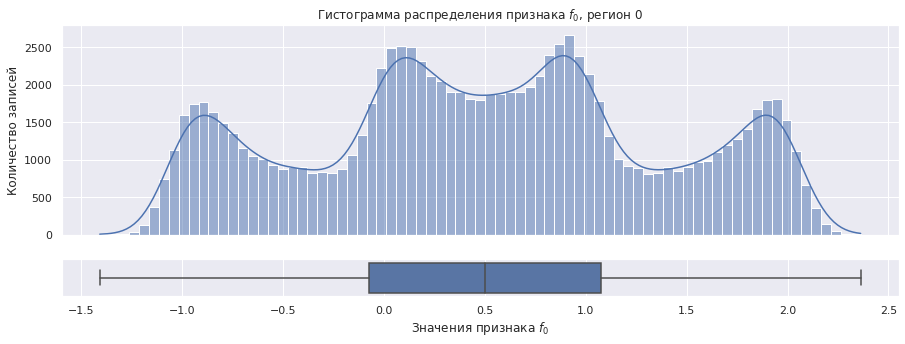

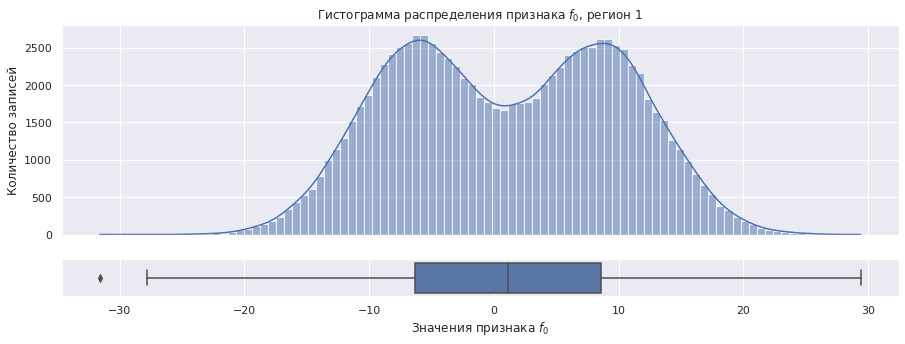

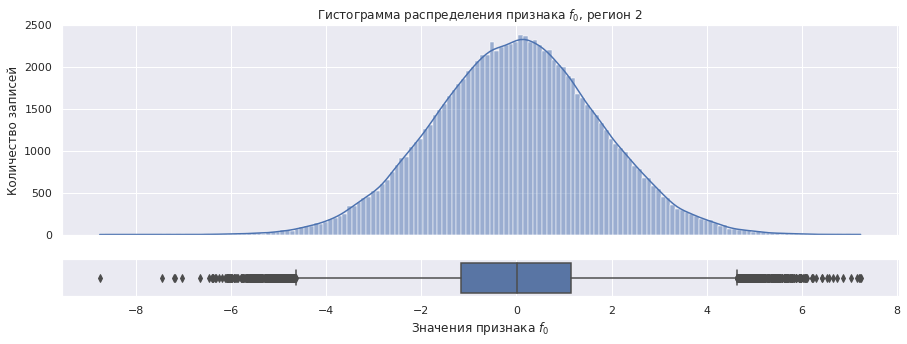

In [82]:
eda('f0', 'f_0')

Видно, что распределения признака $f_0$ для различных регионов сильно отличаются. Для всех трёх регионов значения среднего или медианы близки к диапазону 0—1. Однако размах данных в регионах разный:

| Регион         | Минимальное значение     | Максимальное значение |
|:--------------:|:-----------:|:------------:|
| 0 | -1.4      | 2.4        |
| 1      | -31.6  | 29.4       |
| 2      | -8.8  | 7.2       |

Также различается и характер распределений. Если для региона 2 распределение похоже на нормальное, то распределение признака в первом регионе скорее напоминает иллюстрацию к «Маленькому принцу», а распределение в нулевом регионе имеет четыре выраженных пика.

#### Признак $f_1$

Параметр f1 в датафрейме df0:


,f1
count,100000.000000
mean,0.250143
std,0.504433
min,-0.848218
25%,-0.200881
50%,0.250252
75%,0.700646
max,1.343769


Параметр f1 в датафрейме df1:


,f1
count,100000.000000
mean,-4.796579
std,5.119872
min,-26.358598
25%,-8.267985
50%,-4.813172
75%,-1.332816
max,18.734063


Параметр f1 в датафрейме df2:


,f1
count,100000.000000
mean,-0.002081
std,1.730417
min,-7.084020
25%,-1.174820
50%,-0.009482
75%,1.163678
max,7.844801


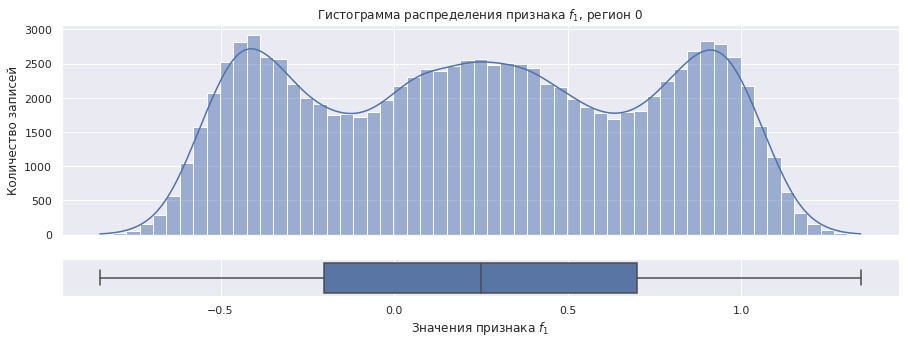

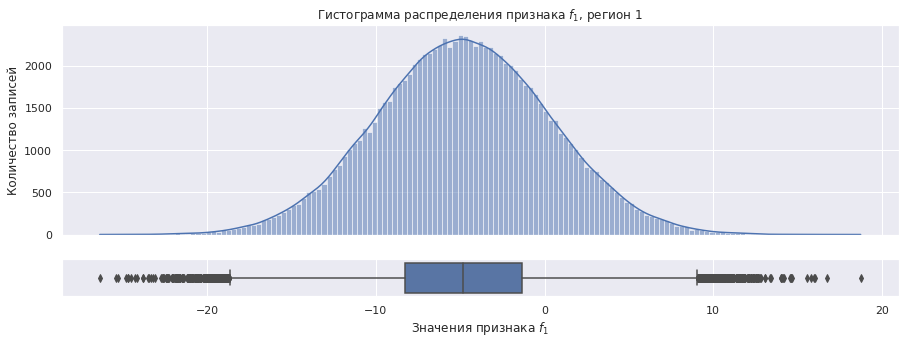

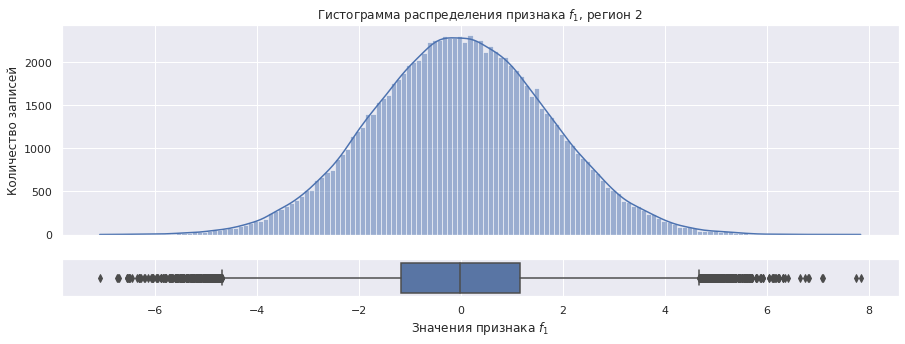

In [83]:
eda('f1', 'f_1')

Распределения признака $f_1$ для различных регионов также сильно отличаются. Для регионов 0 и 2 значения среднего или медианы близки к нулю, однако для региона 1 они близки к минус пяти. Размах данных в регионах разный:

| Регион         | Минимальное значение     | Максимальное значение |
|:--------------:|:-----------:|:------------:|
| 0 | -0.8      | 1.3        |
| 1      | -26.4  | 18.7      |
| 2      | -7.1  | 7.8       |

Характер распределений различается по регионам. Для регионов 1 и 2 распределение похоже на нормальное, но в распределении для региона 0 наблюдаются три выраженных пика.

#### Признак $f_2$

Параметр f2 в датафрейме df0:


,f2
count,100000.000000
mean,2.502647
std,3.248248
min,-12.088328
25%,0.287748
50%,2.515969
75%,4.715088
max,16.003790


Параметр f2 в датафрейме df1:


,f2
count,100000.000000
mean,2.494541
std,1.703572
min,-0.018144
25%,1.000021
50%,2.011479
75%,3.999904
max,5.019721


Параметр f2 в датафрейме df2:


,f2
count,100000.000000
mean,2.495128
std,3.473445
min,-11.970335
25%,0.130359
50%,2.484236
75%,4.858794
max,16.739402


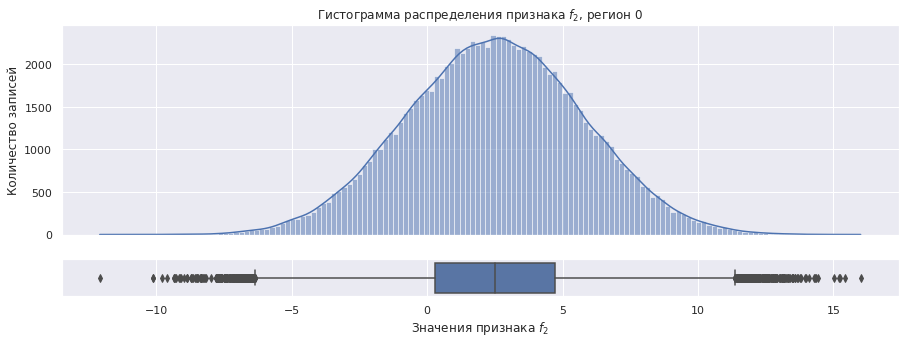

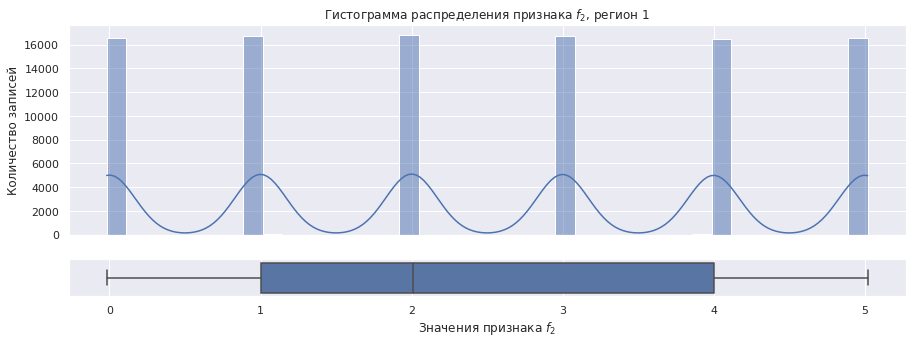

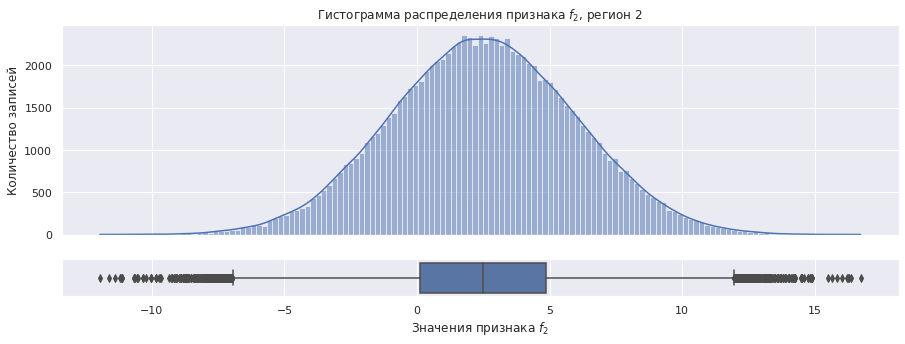

In [84]:
eda('f2', 'f_2')

Распределения признака $f_2$ для регионов 0 и 2 различаются не сильно: они похожи на нормальные со средним примерно равным 2.5 и похожими стандартными отклонениями. Однако в регионе 1 характер распределения уже явно другой: данные группируются вокруг значений 0, 1 ... 5.

#### Объём запасов

Параметр product в датафрейме df0:


,product
count,100000.000000
mean,92.500000
std,44.288691
min,0.000000
25%,56.497507
50%,91.849972
75%,128.564089
max,185.364347


Параметр product в датафрейме df1:


,product
count,100000.000000
mean,68.825000
std,45.944423
min,0.000000
25%,26.953261
50%,57.085625
75%,107.813044
max,137.945408


Параметр product в датафрейме df2:


,product
count,100000.000000
mean,95.000000
std,44.749921
min,0.000000
25%,59.450441
50%,94.925613
75%,130.595027
max,190.029838


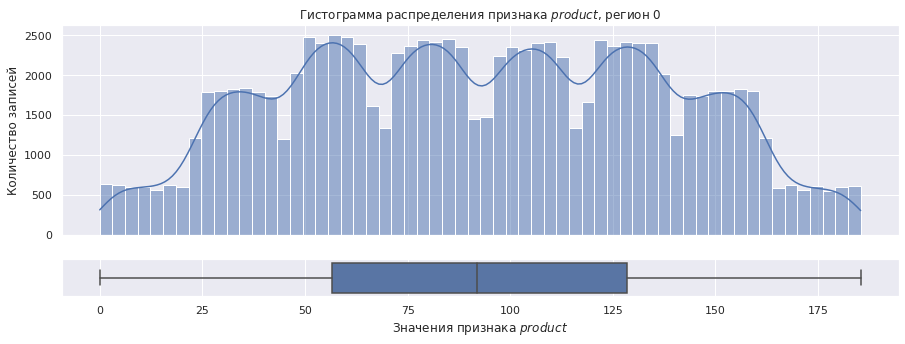

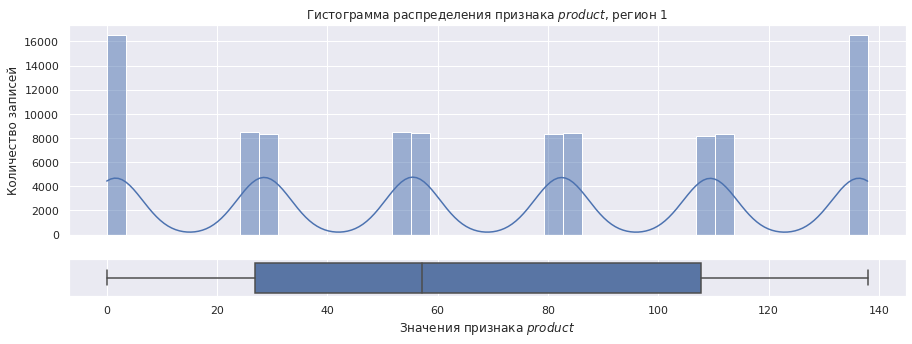

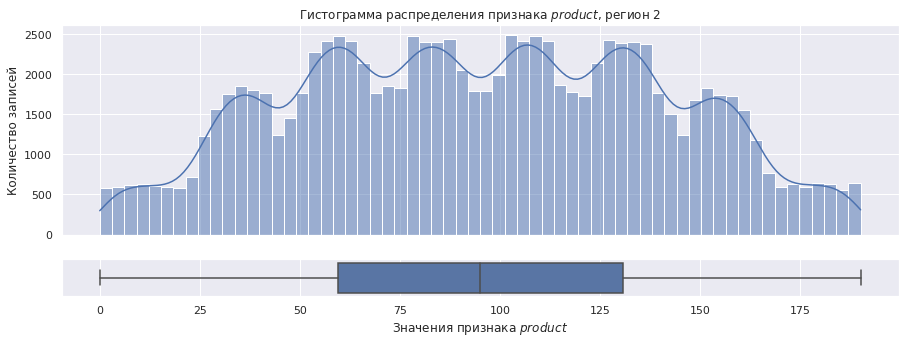

In [85]:
eda('product', 'product')

Для всех трёх регионов распределения объмов запасов отличаются от нормальных. В каждом регионе на диаграмме рассеивания можно наблюдать пики значений, в первом регионе они наиболее выражены.

Возможно подобные распределения обусловлены тем, что в регионах можно выделить характерные подрегионы, средние значения для которых и выглядят как пики на распределениях.

#### Матрицы корреляций

Построим матрицы корреляций для каждого региона.

In [86]:
corr0 = df0.corr()
corr1 = df1.corr()
corr2 = df2.corr()

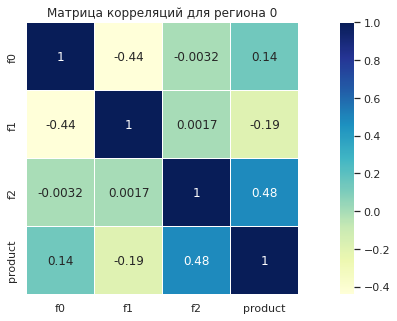

In [87]:
sns.heatmap(data=corr0, square=True, cmap="YlGnBu", linewidths=.5, annot=True)\
.set(title='Матрица корреляций для региона 0');

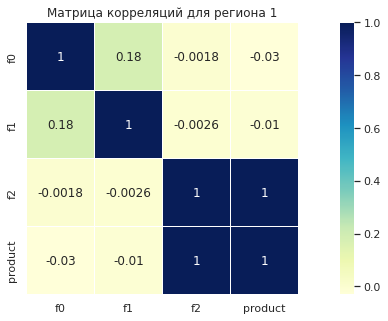

In [88]:
sns.heatmap(data=corr1, square=True, cmap="YlGnBu", linewidths=.5, annot=True)\
.set(title='Матрица корреляций для региона 1');

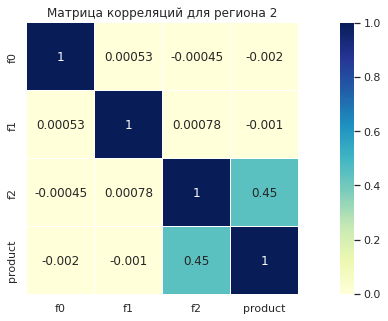

In [89]:
sns.heatmap(data=corr2, square=True, cmap="YlGnBu", linewidths=.5, annot=True)\
.set(title='Матрица корреляций для региона 2');

Для регионов 0 и 2 не наблюдается сильной корреляции между признаками. Некоторая корреляция наблюдается только между признаком $f_2$ и объёмом запасов (значения коэффициента корреляции Пирсона 0,48 и 0,45).

Однако для региона 1 наблюдается очень сильная корреляция между признаком $f_2$ и объёмом запасов (коэффициент корреляции Пирсона 1). Это подозрительно, возможно в данные закралась ошибка. Построим отдельно график зависимости объёмов запасов от признака $f_2$ для первого региона.

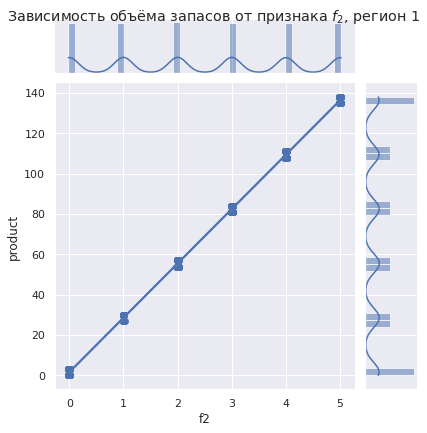

In [90]:
sns.jointplot(data=df1, x='f2', y='product', kind='reg')
plt.suptitle('Зависимость объёма запасов от признака $f_2$, регион 1', y=1)
plt.show()

Видно, что объёмы запасов действительно сильно зависят от признака $f_2$. Значения плотно группируются вокруг нескольких точек ($f_2 = 0, 1, 2 ... 5$). Без понимания природы признака $f_2$ сложно сказать, связано ли это с особенностями нефтедобычи в первом регионе или мы имеем дело с так называемой «утечкой данных» (англ. *data leak*, когда информация о зависимом признаке как-то «просачивается» в независимые признаки).

### Промежуточный вывод

В результате анализа в полученных данных не было выявлено пропусков, дубликатов или подозрительных выбросов. Установлено, что распределения признаков $f_1, f_2, f_3$ для регионов 0, 1 и 2 существенно различаются. Было также установлено, что для региона 1 наблюдается сильная (коэффициент Пирсона 1) корреляция между признаком $f_2$ и объёмом добычи. 

## Обучение и проверка модели

### Создание моделей
Построим для каждого региона модель машинного обучения на основе линейной регрессии (таковы условия задачи). Для этого предварительно разобъём данные на учебные и тестовые выборки.

In [91]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df0[['f0', 'f1', 'f2']], 
                                                        df0['product'], 
                                                        test_size=0.25, 
                                                        random_state=42)

In [92]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1[['f0', 'f1', 'f2']], 
                                                        df1['product'], 
                                                        test_size=0.25, 
                                                        random_state=42)

In [93]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2[['f0', 'f1', 'f2']], 
                                                        df2['product'], 
                                                        test_size=0.25, 
                                                        random_state=42)

Обучим модели на новых выборках.

In [94]:
model0 = LinearRegression()
model0.fit(X0_train, y0_train)

LinearRegression()

In [95]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [96]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

### Расчёт метрик

Посмотрим, что свежеобученные модели предскажут на тестовых выборках. Для оценки качества моделей будем использовать метрику RMSE (англ. *root-mean-square error*, корень из среднеквадратичной ошибки).

In [97]:
pred0 = model0.predict(X0_test)
print('Mean predicted product:', np.mean(pred0))
rmse0 = mean_squared_error(y0_test, pred0, squared=False)
print('RMSE_0:', rmse0)

Mean predicted product: 92.3987999065777
RMSE_0: 37.756600350261685


In [98]:
pred1 = model1.predict(X1_test)
print('Mean predicted product:', np.mean(pred1))
rmse1 = mean_squared_error(y1_test, pred1, squared=False)
print('RMSE_0:', rmse1)

Mean predicted product: 68.71287803913762
RMSE_0: 0.890280100102884


In [99]:
pred2 = model2.predict(X2_test)
print('Mean predicted product:', np.mean(pred2))
rmse2 = mean_squared_error(y2_test, pred2, squared=False)
print('RMSE_2:', rmse2)

Mean predicted product: 94.77102387765939
RMSE_2: 40.14587231134218


#### Промежуточный вывод

Были созданы и обучены модели, предсказывающие объём запасов по признакам $f_0$, $f_1$, $f_2$. Для регионов 0, 1, 2 были получены предсказания моделей для тестовых выборок. Средние предсказанные запасы сырья по регионам и корни среднеквадратичных ошибок (RMSE) представлены в таблице ниже:

| Регион         | Среднее предсказанных запасов  | RMSE |
|:--------------:|:-----------:|:--:|
| 0 | 92.5      | 37.7 |
| 1      | 68.3  | 0.9 |
| 2      | 94.9  | 40.2      |

Для региона 1 метрика RMSE довольно низка, что ожидаемо, если принять во внимание обнаруженную ранее сильную корреляцию переменных product и $f_2$.

## Подготовка к расчёту прибыли

### Определение порогового объёма сырья
Посчитаем достаточный объём сырья для безубыточной разработки новой скважины. Известно, что один баррель сырья приносит 450 рублей дохода. Соответственно, доход с тысячи баррелей (именно так задана переменная `product`) равен 450 000 рублей. Бюджет на разработку новых скважин в регионе — 10 млрд рублей. В одном регионе одновременно разрабатывается 200 новых скважин.

In [100]:
THOUSAND_BARREL_INCOME = 450000
N_OF_WELLS = 200
REGIONAL_DEVELOPMENT_BUDGET = 10000000000

На разработку одной скважины $i$ будет потрачено

$$B_i = \frac{B_t}{n} = \frac{10000000000}{200} [рублей] = 50000000 [рублей],$$

где $B_t$ — бюджет на разработку новых скважин в регионе, $n$ — количество новых скважин.

In [101]:
one_well_budget = REGIONAL_DEVELOPMENT_BUDGET / N_OF_WELLS

Таким образом, чтобы разработка скважины была экономически оправдана, должно выполняться условие:
$$ B_i < P_i \cdot I,$$
где $P_i$ — объём запасов в скважине, $I$ — доход от продажи 1000 баррелей. 

Таким образом минимальный достаточный объём запасов для разработки нового месторождения определяется по формуле:

$$ P_t = \frac{B_i}{I} $$

$$ P_t = \frac{50 000 000}{450 000}[тыс. баррелей] $$

$$ P_t = 111.(1) [тыс. баррелей] $$

In [102]:
product_threshold = one_well_budget / THOUSAND_BARREL_INCOME

Вернёмся к ранее рассчитанным средним значениям предсказанных объёмов запасов по регионам.

| Регион         | Среднее предсказанных запасов  |
|:--------------:|:-----------:|
| 0 | 92.5      | 
| 1      | 68.3  |
| 2      | 94.9  | 

Видно, что во всех трёх регионох средние предсказанные запасы меньше, чем пороговое значение объёмов, при котором разработка новой скважины оправдано. А значит, нам придётся постараться, чтобы отобрать скважины с наибольшими объёмами.

### Промежуточный вывод

Был расчитан пороговый уровень объёма запасов в одной скважине, при котором разработка этой скважины становится экономически оправданной (прибыль покрывает все затраты на разработку). При этом было показано, что средние предсказанные объёмы запасов в регионах 0, 1, 2 меньше, чем рассчитанное пороговое значение. А следовательно, чтобы разработка новых скважин была экономически эффективна, необходимо тщательно отбирать кандидатов для разработки.

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели. Функция будет выбирать 200 скважин с максимальными значениями предсказаний, суммировать целевое значение объёма запасов и рассчитывать прибыль.

In [103]:
def calculate_profit(target, prediction):
    best_predicted = pd.Series(prediction).sort_values(ascending=False).head(200)
    best_predicted_real = target[best_predicted.index]
    total_product = best_predicted_real.sum()
    total_income = total_product * THOUSAND_BARREL_INCOME
    total_profit = total_income - REGIONAL_DEVELOPMENT_BUDGET
    return total_profit

Применим технику *Bootstrap* с 1000 выборок для каждого региона, чтобы найти распределение прибыли.

In [104]:
def bootstrap(y_test, y_pred, region):
    state = np.random.RandomState(42)
    bootstrap_profit_bil = []

    y_test = pd.Series(y_test).reset_index(drop=True)
    y_pred = pd.Series(y_pred).reset_index(drop=True)

    for _ in range(1000):
        samples = y_test.sample(500, random_state=state)
        samples_pred = y_pred[samples.index]

        samples_profit = calculate_profit(samples, samples_pred)
        samples_profit_bil = samples_profit / 1000000000
        bootstrap_profit_bil.append(samples_profit_bil)

    bootstrap_profit_bil = pd.Series(bootstrap_profit_bil)

    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True,
                                      gridspec_kw={"height_ratios": (.85, .15)})
    sns.histplot(data=bootstrap_profit_bil, kde=True, ax=ax_hist)\
    .set(title='Распределение прибыли, регион ' + str(region),
       ylabel='Количество')
    sns.boxplot(data=bootstrap_profit_bil, 
                x=bootstrap_profit_bil.values, ax=ax_box)\
    .set(xlabel='Прибыль [млрд. руб.]')

    mean_profit = bootstrap_profit_bil.mean()
    ci_lower = bootstrap_profit_bil.quantile(0.025)
    ci_upper = bootstrap_profit_bil.quantile(0.975)
    neg_profit = bootstrap_profit_bil[bootstrap_profit_bil < 0].size\
    /bootstrap_profit_bil.size
    print('Средняя прибыль по региону:', round(mean_profit, 2), 'млрд. руб.', 
        '\nДоверительный интервал:', round(ci_lower, 2), '---',
        round(ci_upper, 2),
        '\nВероятность убытков:', round(neg_profit * 100, 2), '%')

### Регион 0

Средняя прибыль по региону: 0.41 млрд. руб. 
Доверительный интервал: -0.14 --- 0.95 
Вероятность убытков: 7.4 %


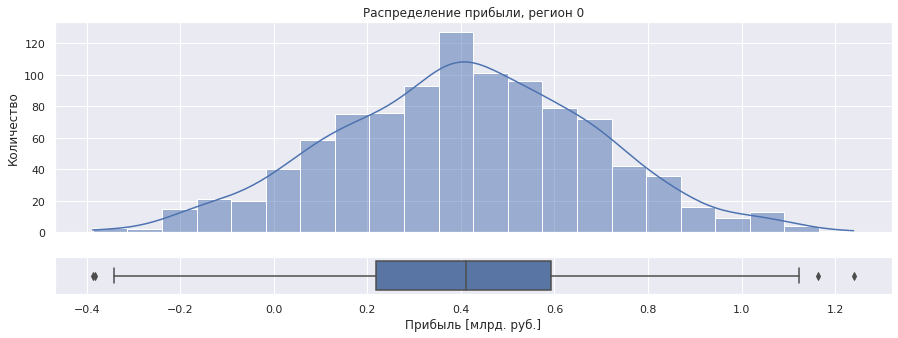

In [105]:
bootstrap(y0_test, pred0, 0)

### Регион 1

Средняя прибыль по региону: 0.44 млрд. руб. 
Доверительный интервал: 0.02 --- 0.83 
Вероятность убытков: 2.2 %


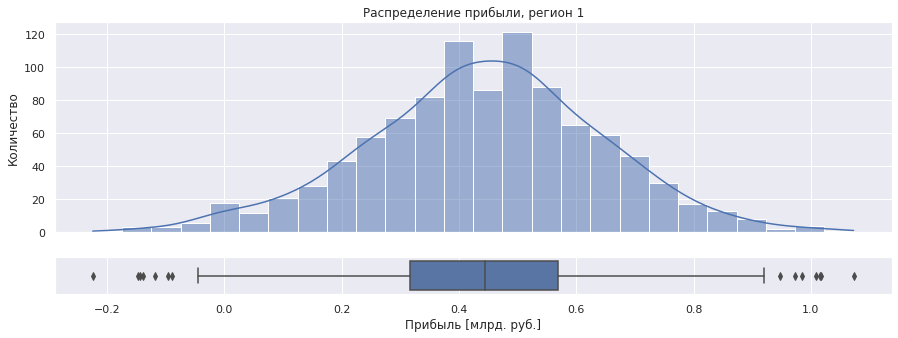

In [106]:
bootstrap(y1_test, pred1, 1)

### Регион 2

Средняя прибыль по региону: 0.38 млрд. руб. 
Доверительный интервал: -0.15 --- 0.87 
Вероятность убытков: 7.8 %


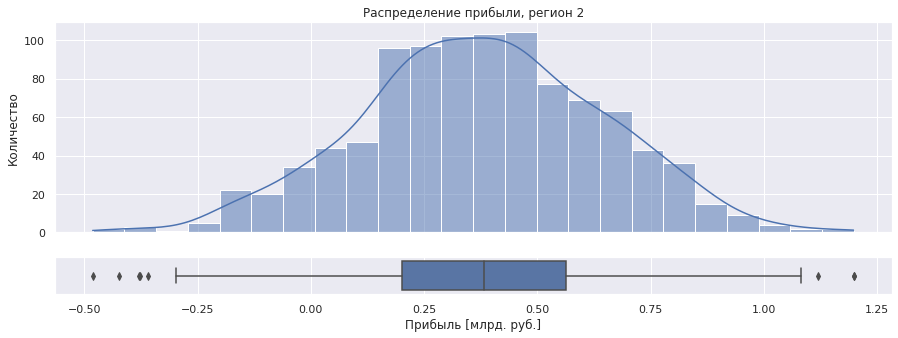

In [107]:
bootstrap(y2_test, pred2, 2)

### Предварительные выводы

Мы применили методику *Bootstrap* для прогнозирования прибыльности разработки месторождений в регионах 0, 1 и 2. Полученные выборки в соответствии с центральной предельной теоремой стремятся к нормальному распределению. В результате были получены следующее оценки средней прибыли и вероятности получения убытка при разработке 200 новых месторождений в регионе:

| Регион         | Прогноз средней прибыли     | Прогноз вероятности убытка|
|:--------------:|:-----------:|:------------:|
| 0 | 0.41 млрд. руб.      | 7.4 %        |
| 1      | 0.44 млрд. руб. | 2.2 %      |
| 2      | 0.38 млрд. руб.  | 7.8 %       |

Видно, что в регионе 1 прогноз средней прибыли выше, а прогноз вероятности получения убытка меньше. Исходя из этого можно рекомендовать регион 1 для разработки новых месторождений. Однако следует помнить, что на этапе исследовательского анализа данных мы обнаружили возможную «протечку» данных, что могло исказить разработанную модель, а также оценки прибыли и убытка.

## Общий вывод по проекту

В рамках данного проекта методы машинного обучения были применены для получения рекомендаций по выбору перспективного региона для разработки новых месторождений.

Выбор производился из трёх регионов. Для каждого региона были созданы и обучены модели, предсказывающие объём запасов по признакам $f_0$, $f_1$, $f_2$. Для регионов 0, 1, 2 были получены предсказания моделей для тестовых выборок. Средние предсказанные запасы сырья по регионам и корни среднеквадратичных ошибок (RMSE) представлены в таблице ниже:

| Регион         | Среднее предсказанных запасов  | RMSE |
|:--------------:|:-----------:|:--:|
| 0 | 92.5      | 37.7 |
| 1      | 68.3  | 0.9 |
| 2      | 94.9  | 40.2      |

Для региона 1 метрика RMSE довольно низка, что ожидаемо, если принять во внимание обнаруженную ранее сильную корреляцию переменных product и $f_2$.

Был расчитан пороговый уровень объёма запасов в одной скважине, при котором разработка этой скважины становится экономически оправданной (прибыль покрывает все затраты на разработку). При этом было показано, что средние предсказанные объёмы запасов в регионах 0, 1, 2 меньше, чем рассчитанное пороговое значение. А следовательно, чтобы разработка новых скважин была экономически эффективна, необходимо тщательно отбирать кандидатов для разработки.

Мы также применили методику *Bootstrap* для прогнозирования прибыльности разработки месторождений в регионах 0, 1 и 2. Полученные выборки в соответствии с центральной предельной теоремой стремятся к нормальному распределению. В результате были получены следующее оценки средней прибыли и вероятности получения убытка при разработке 200 новых месторождений в регионе:

| Регион         | Прогноз средней прибыли     | Прогноз вероятности убытка|
|:--------------:|:-----------:|:------------:|
| 0 | 0.41 млрд. руб.      | 7.4 %        |
| 1      | 0.44 млрд. руб. | 2.2 %      |
| 2      | 0.38 млрд. руб.  | 7.8 %       |

Видно, что в регионе 1 прогноз средней прибыли выше, а прогноз вероятности получения убытка меньше. Исходя из этого можно рекомендовать регион 1 для разработки новых месторождений. Однако следует помнить, что на этапе исследовательского анализа данных мы обнаружили возможную «протечку» данных, что могло исказить разработанную модель, а также оценки прибыли и убытка.

На основе полученных данных рекомендуется выбрать для разработки новых месторождений регион 1, так как в нём вероятность получения убытка ниже, чем в регионах 0 и 2, а прогноз средней прибыли — выше.